In [12]:
from netCDF4 import Dataset
import numpy as np
import os 
os.environ["PROJ_LIB"] = "C:\\Users\rakib\anaconda3\Library\share"
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [13]:
data = Dataset("./TEC_DATA/REPRO2013_2014/podTec_C001.2014.120.00.01.0031.G28.01_2013.3520_nc")
data.variables.keys()

dict_keys(['time', 'TEC', 'elevation', 'caL1_SNR', 'pL2_SNR', 'x_LEO', 'y_LEO', 'z_LEO', 'x_GPS', 'y_GPS', 'z_GPS'])

In [14]:
def toMeters(x):
    return x/1000

In [15]:
x_LEO = data.variables['x_LEO'][:].data
y_LEO = data.variables['y_LEO'][:].data
z_LEO = data.variables['z_LEO'][:].data

# convert from km to m 
x_LEO = toMeters(x_LEO)
y_LEO = toMeters(y_LEO)
z_LEO = toMeters(z_LEO)

In [16]:
TEC = data.variables['TEC'][:].data


In [17]:
def toLat(z):
    lat = np.arcsin(z/6371)
#   convert to degrees
    lat = lat * 180/np.pi
    return lat

toLat(0.5)
max(z_LEO)

6.847992833

In [18]:
def toLon(y, x):
    lon = np.arctan2(y, x)
    lon = lon * 180 / np.pi
    return lon

In [19]:
lat = []

for i in range(x_LEO.size):
    z = z_LEO[i]
    lat.append(toLat(z))

In [20]:
lon = []

for i in range(x_LEO.size):
    y = y_LEO[i]
    x = x_LEO[i]
    lon.append(toLon(y, x))

In [21]:
min(lat)
max(lat)

min(lon)
max(lon)

179.88376010431773

TypeError: Input z must be 2D, not 1D

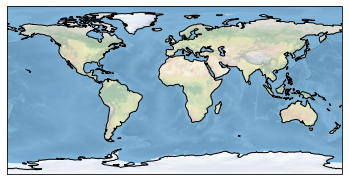

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

# plt.show()
plt.contour(lat, lon, TEC, tranform=ccrs.PlateCarree())